# Graded Challenge 2

Graded Challenge 2 assignment by Arvin Assanny from Batch-HCK-003

## Description
Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Mathematics and Statistics.

### Assignment Problems
Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah.

## Problem 1 (Stats)

## Obtain Dataset From Google Big Query

I am using data from Google Big Query from austin_waste in waste_and_diversion table

In order to retrieves records from database, I use this query:
```
SELECT report_date, 
  load_time, 
  load_type, 
  load_weight, 
  dropoff_site 
FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE report_date >= '2021-01-01'
```
By using this query I manage to retrieve the dataset needed, and then i save it on .csv file to be loaded and analyzed

## Import Library

Import all the libraries that will be used during data analyzing and processing

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Load the data into the notebook, then proceed to do some basic overview with data

In [2]:
df = pd.read_csv('h8dsft_P0GC2_arvin_assanny.csv')
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


In [4]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF


In [5]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


Here we showed the overview of our dataframe. This step is important to give us wider view in processing data.

## Data Cleaning

#### Handling Missing Value

In [6]:
df.isnull().any()

report_date     False
load_time       False
load_type       False
load_weight      True
dropoff_site    False
dtype: bool

In [7]:
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

Here we see so many missing values in our data. In the next step we will handle these missing values, where we drop the missing value that appears in our data.

In [8]:
# drop missing value because it less than 5 percent
df.dropna(subset = 'load_weight', axis = 0, inplace = True)
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF
...,...,...,...,...,...
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH


In [9]:
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

Now our data has been cleaned of the missing values

#### Data Preprocessing

In [10]:
# Mengganti datatype report_date dari string menjadi datetime
df['report_date'] = pd.to_datetime(df['report_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25109 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   25109 non-null  datetime64[ns]
 1   load_time     25109 non-null  object        
 2   load_type     25109 non-null  object        
 3   load_weight   25109 non-null  float64       
 4   dropoff_site  25109 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.1+ MB


Change the datatype to make it easier to sort by.

In [11]:
# drop load_time column because no need to use & simplify
df.drop(['load_time'], axis = 1, inplace = True)
df.head(3)

,report_date,load_type,load_weight,dropoff_site
0,2021-07-08,TIRES,2260.0,MRF
1,2021-07-08,TIRES,1260.0,MRF
2,2021-07-08,TIRES,800.0,MRF


We also drop load_time to make our data tidyer and more simple.

In [12]:
# Sorting data by report date
df.sort_values(by='report_date', inplace=True, ascending=True)
df

,report_date,load_type,load_weight,dropoff_site
19227,2021-01-02,ORGANICS,16760.0,ORGANICS BY GOSH
19159,2021-01-02,GARBAGE COLLECTIONS,10580.0,TDS LANDFILL
19160,2021-01-02,GARBAGE COLLECTIONS,21300.0,TDS LANDFILL
19161,2021-01-02,GARBAGE COLLECTIONS,17160.0,TDS LANDFILL
19162,2021-01-02,GARBAGE COLLECTIONS,15240.0,TDS LANDFILL
...,...,...,...,...
211,2021-07-09,BRUSH,5500.0,HORNSBY BEND
207,2021-07-09,BRUSH,5500.0,HORNSBY BEND
208,2021-07-09,BRUSH,5500.0,HORNSBY BEND
217,2021-07-09,BRUSH,5500.0,HORNSBY BEND


We sort by the data by the earliest data reported, this is a good step to make it tidyer.

In [13]:
# reset index afret drop missing value and column
df.reset_index(inplace=True, drop=True)
df

,report_date,load_type,load_weight,dropoff_site
0,2021-01-02,ORGANICS,16760.0,ORGANICS BY GOSH
1,2021-01-02,GARBAGE COLLECTIONS,10580.0,TDS LANDFILL
2,2021-01-02,GARBAGE COLLECTIONS,21300.0,TDS LANDFILL
3,2021-01-02,GARBAGE COLLECTIONS,17160.0,TDS LANDFILL
4,2021-01-02,GARBAGE COLLECTIONS,15240.0,TDS LANDFILL
...,...,...,...,...
25104,2021-07-09,BRUSH,5500.0,HORNSBY BEND
25105,2021-07-09,BRUSH,5500.0,HORNSBY BEND
25106,2021-07-09,BRUSH,5500.0,HORNSBY BEND
25107,2021-07-09,BRUSH,5500.0,HORNSBY BEND


Reseting index to make it cleaner and the index are sorted from the lowest number to the highest.

## Data Exploration

In [14]:
# Melihat rentang waktu pengambilan data
min, max = df['report_date'].agg(['min', 'max',])
print("Earliest date = ", min)
print("Latest date = ", max)

Earliest date =  2021-01-02 00:00:00
Latest date =  2021-07-09 00:00:00


We can see the earliest date is 2021-01-02 and the latest date is 2021-07-09

In [15]:
# Melihat rentang waktu pengambilan data dari total hari
pd.date_range(start = '2021-01-02', end = '2021-07-09')

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
               '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09'],
              dtype='datetime64[ns]', length=189, freq='D')

We can see total date from the data we have is 189 days.

In [16]:
# Melihat jenis load_type pada dataset
df['load_type'].unique()

array(['ORGANICS', 'GARBAGE COLLECTIONS', 'MIXED LITTER', 'DEAD ANIMAL',
       'BULK', 'RECYCLING - SINGLE STREAM', 'TIRES', 'YARD TRIMMING',
       'BRUSH', 'SWEEPING', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [17]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5749
BULK                         1594
BRUSH                        1514
SWEEPING                      360
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Here we can see what are the kind of waste in our data and also their total counts.

In [18]:
# Melihat dimana saja tempat dropoff_site pada dataset
df['dropoff_site'].unique()

array(['ORGANICS BY GOSH', 'TDS LANDFILL', 'BALCONES RECYCLING', 'MRF',
       'TDS - MRF', 'HORNSBY BEND', 'AUSTIN IRON AND METAL',
       'GREAT NORTHERN', 'AUSTIN WOOD RECYCLING', 'PARK BEND',
       'ON ROUTE HIGH DUMP', 'BALCONES WOODS', 'STEINER LANDFILL',
       'WESTFIELD'], dtype=object)

In [19]:
df['dropoff_site'].value_counts()

TDS LANDFILL             10691
ORGANICS BY GOSH          5741
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1652
MRF                        168
AUSTIN IRON AND METAL       50
ON ROUTE HIGH DUMP           7
GREAT NORTHERN               6
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
Name: dropoff_site, dtype: int64

Here we can see where are our dropoff site in our data and also their total counts.

In [20]:
df['load_weight'].agg(['min', 'max',])

min         0.0
max    245540.0
Name: load_weight, dtype: float64

We know that the highest load weight in our data is 245540.

### Central Tendency

We will use group by function to group the central tendency of load_weight for each of the dropoff_site. We also sort the data from the highest value.

In [21]:
df.groupby(by = 'dropoff_site')['load_weight'].mean().sort_values(ascending = False)

dropoff_site
GREAT NORTHERN           19153.333333
WESTFIELD                16020.000000
TDS LANDFILL             15169.407215
PARK BEND                13385.000000
ON ROUTE HIGH DUMP       12525.714286
ORGANICS BY GOSH         11818.482146
TDS - MRF                 9872.550882
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
HORNSBY BEND              6628.644068
AUSTIN WOOD RECYCLING     4050.000000
MRF                       1799.982143
STEINER LANDFILL           780.000000
AUSTIN IRON AND METAL      451.200000
Name: load_weight, dtype: float64

GREAT NORTHERN has the highest average load weight compared to other site

In [22]:
df.groupby(by = 'dropoff_site')['load_weight'].median().sort_values(ascending = False)

dropoff_site
GREAT NORTHERN           21110.0
WESTFIELD                16020.0
ON ROUTE HIGH DUMP       14940.0
TDS LANDFILL             14920.0
PARK BEND                12330.0
ORGANICS BY GOSH         11920.0
TDS - MRF                10330.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
HORNSBY BEND              6390.0
AUSTIN WOOD RECYCLING     4050.0
MRF                       1360.0
STEINER LANDFILL           780.0
AUSTIN IRON AND METAL      400.0
Name: load_weight, dtype: float64

GREAT NORTHERN also has the highest median load weight compared to other site

In [23]:
# insert result into table
df.groupby(by = 'dropoff_site', sort = True)['load_weight'].apply(pd.Series.mode).to_frame()

load_weight
dropoff_site                        
AUSTIN IRON AND METAL 0        260.0
                      1        320.0
                      2        520.0
AUSTIN WOOD RECYCLING 0       2340.0
                      1       5760.0
BALCONES RECYCLING    0      11880.0
BALCONES WOODS        0       8460.0
GREAT NORTHERN        0       8700.0
                      1      17160.0
                      2      20900.0
                      3      21320.0
                      4      21960.0
                      5      24880.0
HORNSBY BEND          0       5500.0
MRF                   0        960.0
ON ROUTE HIGH DUMP    0       4060.0
                      1       7480.0
                      2      12500.0
                      3      14940.0
                      4      15040.0
                      5      15200.0
                      6      18460.0
ORGANICS BY GOSH      0      14580.0
PARK BEND             0       8480.0
                      1       8960.0
                      2      15700.0
                      3      20400.0
STEINER LANDFILL      0        780.0
TDS - MRF             0      10360.0
TDS LANDFILL          0         20.0
                      1         60.0
                      2      12020.0
WESTFIELD             0      16020.0

Now we use mode function mode to know that GREAT NORTHERN has the highest mode along with 5 multiple modes ranging between 8700 - 24880.

### Choose Our Site

In [24]:
# We once again, want to see the type of waste in Austin
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5749
BULK                         1594
BRUSH                        1514
SWEEPING                      360
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

We use value.counts() to give us more detail about the site we will choose.

In [25]:
# interested with organics waste
org = df.loc[df['load_type']=='ORGANICS'] # Sliing data to return only organics waste
most_site = org.groupby(by = 'dropoff_site', sort = True)['load_weight'].sum() # Find out the site where the waste is sotred
most_site

dropoff_site
HORNSBY BEND             16160.0
ON ROUTE HIGH DUMP       87680.0
ORGANICS BY GOSH      67744966.0
PARK BEND                53540.0
TDS LANDFILL             28020.0
Name: load_weight, dtype: float64

We would like to explore more about organics by gosh as a major organics waste storage. Organic waste site will make compost from organic waste. which could be use as fertilzer. This is such an interesting site to choose because it give us the chance to analyze such a important site in waste management system.

In [26]:
gosh = df.loc[df['dropoff_site']=='ORGANICS BY GOSH'] # Assigning variable to return data only from ORGANICS BY GOSH
gosh

,report_date,load_type,load_weight,dropoff_site
0,2021-01-02,ORGANICS,16760.0,ORGANICS BY GOSH
9,2021-01-02,ORGANICS,6200.0,ORGANICS BY GOSH
10,2021-01-02,ORGANICS,16800.0,ORGANICS BY GOSH
22,2021-01-02,ORGANICS,20560.0,ORGANICS BY GOSH
23,2021-01-02,ORGANICS,21440.0,ORGANICS BY GOSH
...,...,...,...,...
25061,2021-07-08,ORGANICS,12080.0,ORGANICS BY GOSH
25062,2021-07-08,ORGANICS,14980.0,ORGANICS BY GOSH
25063,2021-07-08,ORGANICS,12860.0,ORGANICS BY GOSH
25064,2021-07-08,ORGANICS,9470.0,ORGANICS BY GOSH


Here we assigned the dataframe into new variable to help us call it when needed.

In [27]:
# Total data where ORGANICS BY GOSH is used as the dropoff site of Organic waste
gosh_total = gosh.value_counts().sum()

In [28]:
# Total population of the dropoff site used for Organic waste
org_total = org.value_counts().sum()

In [29]:
# Find out how much this site contribute compared to other sites on  dataframe.
total_data = round((gosh.value_counts().sum()/org.value_counts().sum()) * 100, 3)
print(total_data, "%")

99.861 %


By dividing total usage of `ORGANICS BY GOSH` on storing the organic waste and total population of sites which store Oragnic waste, then make it to precentage. We now know that `ORGANICS BY GOSH` is the biggest site to store organic waste

## Exploring `ORGANICS BY GOSH` Site

In [30]:
# Checking central tendecies
print ('Mean: ' + str(gosh['load_weight'].mean()))
print ('Mode: ' + str(gosh['load_weight'].mode()[0]))
print ('Median: ' + str(gosh['load_weight'].median()))

Mean: 11818.482145967602
Mode: 14580.0
Median: 11920.0


We want to see measures of central tendecies from load_weight columns from ORGANICS BY GOSH site, which represents our middle value of load_weight column

#### Checking Outliers

First we want to check the distribution of the data

Skewness value: 0.05856144528281351


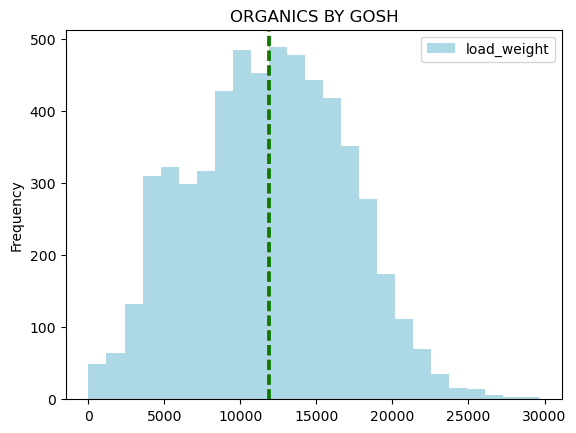

In [31]:
# Checking skewness of the data
print('Skewness value: ' + str(gosh['load_weight'].skew()))

# Make histogram to see the distribution of the data
gosh.plot.hist(title='ORGANICS BY GOSH', color='lightblue', bins=25)  
plt.axvline(gosh['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(gosh['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Using the histogram we can see the data is fairly symmetrical, which means the data is evenly spreaded. To confirm this, we could also use .skew() function.

From using .skew() function, we can know that the skewness value is 0.05, which means our data is fairly symmetrical so it is a normal distribution data.

After knowing these facts, we proceed to check whether the dataset have an outlier or not, to confirm this we could use this boxplot below.

<AxesSubplot:ylabel='load_weight'>

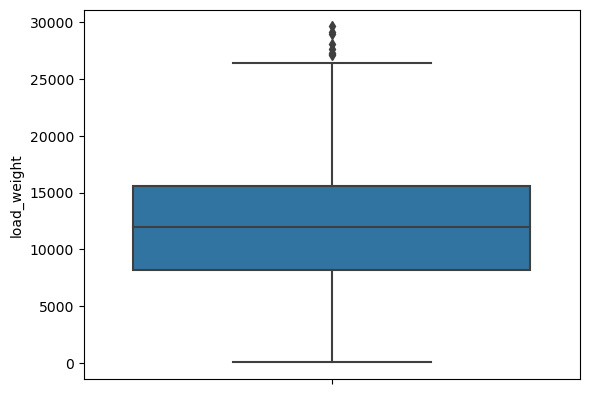

In [32]:
# Showing the outlier plot
sns.boxplot(data=gosh, y = 'load_weight') 

There are some outliers from our data, which appears as black dots in the figure above. Because of this we have to do some futher exploration and handle these outliers.

In [33]:
# Find standard deviation to detect outlier
gosh_std = gosh['load_weight'].std()
gosh_std

5070.763917897264

After knowing the standard deviation value, we can calculate the maximum threshold and minimum threshold using these calculation below.

In [34]:
# Maximum Threshold
max_gosh = gosh['load_weight'].mean() + (3*gosh_std)
max_gosh

27030.773899659394

In [35]:
# Minimum Threshold
min_gosh = gosh['load_weight'].mean() - (3*gosh_std)
min_gosh

-3393.80960772419

Now, we know the threshold for both maximum and minimum value. Therefore, we can find out how many data we have are considered an outlier

In [36]:
# Checking maximum threshold
gosh.loc[gosh['load_weight'] > 27030.77]

,report_date,load_type,load_weight,dropoff_site
6551,2021-02-26,ORGANICS,27620.0,ORGANICS BY GOSH
6972,2021-03-01,ORGANICS,27300.0,ORGANICS BY GOSH
9304,2021-03-15,ORGANICS,27240.0,ORGANICS BY GOSH
20497,2021-06-02,ORGANICS,28120.0,ORGANICS BY GOSH
20635,2021-06-03,ORGANICS,29660.0,ORGANICS BY GOSH
21008,2021-06-07,ORGANICS,29000.0,ORGANICS BY GOSH
22023,2021-06-14,ORGANICS,29160.0,ORGANICS BY GOSH
22137,2021-06-15,ORGANICS,27120.0,ORGANICS BY GOSH


We have 8 data that are considered outliers from the maximum threshold.

In [37]:
# Checking minimum threshold
gosh.loc[gosh['load_weight'] < -3393.80]

,report_date,load_type,load_weight,dropoff_site


It seems that we don't have any outlier from the minimum threshold.

Now we want to know how much percent does the outliers within our data

In [38]:
a = gosh.loc[gosh['load_weight'] > 27030.77].value_counts().sum()

total_outliers = round((a/gosh_total) *100, 2)
print(total_outliers, "%")

0.14 %


From the above result we can see that the outliers has a total impact of 0.18% on our data and I am going to drop these outliers

To remove these outliers, I choose to drop it from their index number

In [39]:
# Doing only for maximum threshold
gosh.drop(index =[6551,6972,9304,20497,20635,21008,22023,22137], inplace=True)

C:\Users\Arvin\AppData\Local\Temp\ipykernel_4420\3743269158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gosh.drop(index =[6551,6972,9304,20497,20635,21008,22023,22137], inplace=True)


Now we should check if those outliers have been removed or not

<AxesSubplot:ylabel='load_weight'>

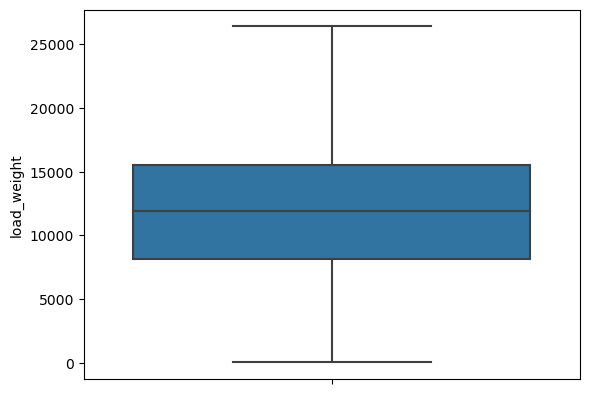

In [40]:
# Showing the outlier plot after removing it
sns.boxplot(data=gosh, y = 'load_weight') 

We can see here that the black dots has dissappeared which means that the outliers have been removed.

After this we will check Measure of central tendencies and measure of variance after the outliers have been removed.

In [41]:
# Checking central tendencies
print ('Mean: ' + str(gosh['load_weight'].mean()))
print ('Mode: ' + str(gosh['load_weight'].mode()[0]))
print ('Median: ' + str(gosh['load_weight'].median()))

Mean: 11795.689167974882
Mode: 14580.0
Median: 11900.0


Based on this new central tendencies, we can see decrease on mean and median values, this may be caused by the removal of the outliers

Skewness value: 0.025331462259777653


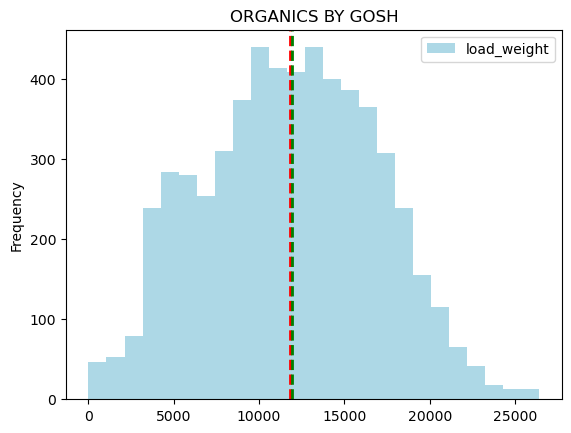

In [42]:
# Checking skewness of the data
print('Skewness value: ' + str(gosh['load_weight'].skew()))

# Make histogram to see the distribution of the data
gosh.plot.hist(title='ORGANICS BY GOSH', color='lightblue', bins=25)  
plt.axvline(gosh['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(gosh['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

We can see here, the skewness value is lower where previously the skewness value was 0.05 and now it is 0.02. This means that the data is more symetrical than before (by removing the outlier) so that the distribution of the data now is more evenly distributed. 

### Measures of Variance

In [43]:
# Find out Range of data by subtracting the minimim value from the maximum value
gosh['load_weight'].max() - gosh['load_weight'].min()

26380.0

Now we want to look at the renge of dataset which has been cleaned and removed its outlier. We can see the range of data is 26380.0. Range calculation shows us about the difference between the lowest and highest values.

In [44]:
# Find out Variance
gosh['load_weight'].var()

25374441.146213844

Variance is a measurement of the spread between numbers in our data. The higher the variance, the more spread your data is around the mean.

Now we want to look at the standar deviation of the data

In [45]:
gosh['load_weight'].std()

5037.3049487016215

Standard deviation may determine if the data has a normal distribution. If the data has a normal curve, then 68% of the data points will fall within the one deviation of the mean.

If the data points are further from the mean, there is a higher deviation within the data set which caused the data to be more spread out. 

### New Site Analysis

Objective : The Government plans on building a new site, we asked to analyze and give suggestion on how much capacity does this new site need.

From this objective we are asked to give sugestion on ORGANICS load_type new site, because we are using Organic by Gosh data to calculate optimum capacity for the new site.

In [46]:
# Grouping data
daily_capacity = gosh.groupby(["report_date"]).sum().sort_values("report_date")

# Calculate Confidential Interval with critical value 0.05
ci = stats.norm.interval(0.95, daily_capacity.load_weight.mean(), daily_capacity.load_weight.std())
ci

(-48311.25806372409, 956025.1641039925)

From this data we know that to gain optimum capacity for Organics waste, the new site should have the maximum capacity of total 956025.16.

## Hypothesis Testing

We want to compare ORGANIC BY GOSH with one of the other dropsite which collects the same organic waste type, but we might want to prepare the second data first.

Here we will show the dataframe from the second selected site which is ON ROUTE HIGH DUMP

In [47]:
# Assign new variable for the comparing site
dump = df.loc[df['dropoff_site']=='ON ROUTE HIGH DUMP']
dump

,report_date,load_type,load_weight,dropoff_site
8411,2021-03-09,ORGANICS,12500.0,ON ROUTE HIGH DUMP
8952,2021-03-11,ORGANICS,15200.0,ON ROUTE HIGH DUMP
9202,2021-03-14,ORGANICS,15040.0,ON ROUTE HIGH DUMP
13575,2021-04-12,ORGANICS,18460.0,ON ROUTE HIGH DUMP
14004,2021-04-14,ORGANICS,4060.0,ON ROUTE HIGH DUMP
20788,2021-06-04,ORGANICS,7480.0,ON ROUTE HIGH DUMP
22019,2021-06-14,ORGANICS,14940.0,ON ROUTE HIGH DUMP


ON ROUTE HIGH DUMP with organic load_type are assign to new variable. After this, we will do hypothesis testing.

In [48]:
dump.value_counts('load_type')

load_type
ORGANICS    7
dtype: int64

We can see that ON ROUTE HIGH DUMP site store organics waste only

#### Hypothesis Testing

We are using T-test 2 Sample 2 Tailed, now we are going to define the H0 and H1

H0 : &mu; Organics By Gosh Load Weight = &mu; On Route High Dump Load Weight

H1 : &mu; Organics By Gosh Load Weight != &mu; On Route High Dump Load Weight



In [49]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(gosh['load_weight'], dump['load_weight'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.7015863277902392
t-statistics: -0.38319911752044467


Here we compare both load weight in each site, using this test we get p-value of the comparison we made.

1922.7528893743201
21668.625446575446


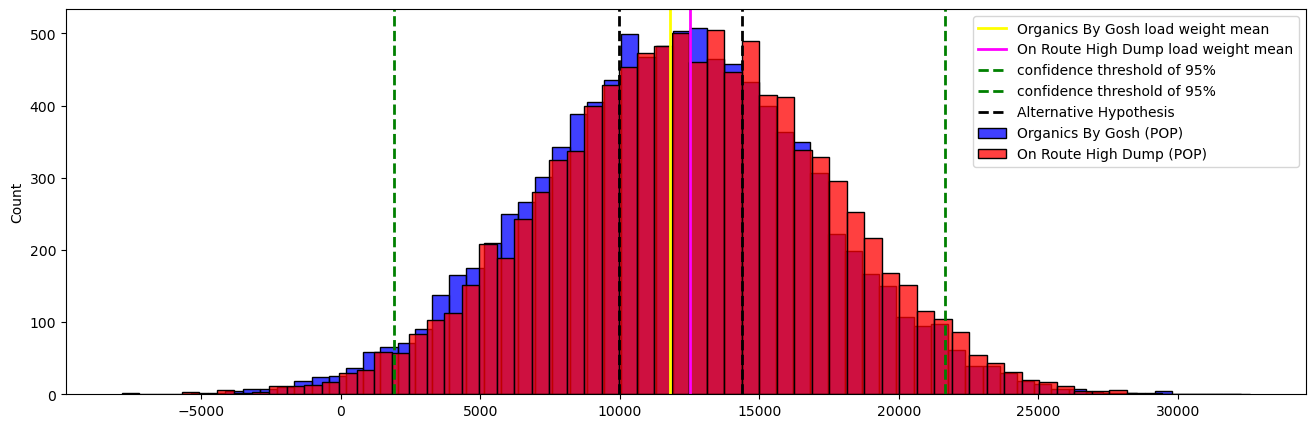

In [50]:
# simulation
gosh_pop = np.random.normal(gosh['load_weight'].mean(),gosh['load_weight'].std(),10000)
tds_pop = np.random.normal(dump['load_weight'].mean(),dump['load_weight'].std(),10000)

# confidence interval based on BALCONS RECYLING
ci = stats.norm.interval(0.95, gosh['load_weight'].mean(), gosh['load_weight'].std())

plt.figure(figsize=(16,5))
sns.histplot(gosh_pop, label='Organics By Gosh (POP)',color='blue')
sns.histplot(tds_pop, label='On Route High Dump (POP)',color='red')

# mean
plt.axvline(gosh['load_weight'].mean(), color='yellow', linewidth=2, label='Organics By Gosh load weight mean')
plt.axvline(dump['load_weight'].mean(), color='magenta',  linewidth=2, label='On Route High Dump load weight mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(gosh_pop.mean()+t_stat*gosh_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(tds_pop.mean()-t_stat*gosh_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])
print(ci[1])

From the results of our T - test. We can conclude on the given data that our hypothesis is we fail to reject the H0 which means that the mean of `ORGANIC BY GOSH` is the same as `ON ROUTE HIGH DUMP`. This also means that the mean value between two site is not statistically significant, so the two site are the same.

## Problem 2

We are asked to predict the load weight of waste for the next day. We can do that by using this formula:

W(tomorrow) = W(today) + V * delta t

delta t can be assigned as 1, because we are predicting for the future.

In [51]:
# First we group by our data
form = df.groupby('report_date')['load_weight'].sum().to_frame()
form

,load_weight
report_date,
2021-01-02,2170130.0
2021-01-04,2920260.0
2021-01-05,2388540.0
2021-01-06,2396550.0
2021-01-07,2438330.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


Here we group the load weight in our data by reported date.

To help our calculation, we define a new variable to calculate our differential of our data. Ater that, we divide them with the differential from our range of data.

In [52]:
v = np.diff(form['load_weight'])/np.diff(range(165))

After assign the variable, now we can calculate the prediction

In [53]:
weight_tommorow = form['load_weight'][-1] + v[-1]*1
abs(weight_tommorow)

1176970.0

We know that tomorrows load weight of waste is 1176970 kg.

## Conclusion

* Using Confidential Interval analysis we know that to gain optimum capacity for Organics waste, the new site should have the maximum capacity of total 956025.16.
 
* From the results of our T - test. We can conclude on the given data that our hypothesis is we fail to reject the H0 which means that the mean of `ORGANIC BY GOSH` is the same as `ON ROUTE HIGH DUMP`.

* Using the calculation we made, we can predict that tomorrows load weight of waste is 1176970 kg.
